In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

# Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/vikaskadam05/MyData/main/avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


There is one unnamed colume which need to be remove.

In [4]:
df=df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.shape

(18249, 13)

There are 18249 rows and 13 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are 9 floats, 1 integer and 3 objects data types showing in this dataset. Need to change the date colum from object to date format.


In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


I am going to separate the date column into 3 different columns i.e. date, month, year.

In [10]:
# extract the day, month, and year components
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

In [11]:
#Removing date column from dataset
df=df.drop('Date', axis=1)

In [12]:
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,22,11
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,15,11
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,8,11
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,1,11
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,25,10


In [13]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
day             0
month           0
dtype: int64

There is no null value present in this dataset.

In [14]:
for i in df.columns:
    print(df[i].value_counts(), "\n")

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64 

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64 

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64 

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64 

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name

Need to convert categorical data into continues data of column name 'type' & 'region'

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=le.fit_transform(df['type'])
df['type']=df1

In [16]:
df2=le.fit_transform(df['region'])
df['region']=df2

In [17]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,11


In [18]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [19]:
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,31.000000,12.000000


## Observation:
All data is available in every columns. 
XLarge Bags column has high 0 values which may affect the model building.

Stdard Division and mean value is not proper in Tota Bags, Small Bags, Xlarge Bags columns.

Mean data and 50% data of column 'Total Volumn', '4046', 'total Bags', 'Small Bags', 'Large Bags' is not proper. I means there are outliers present in this columns

There is huge different between 75% and Max number of column XLarge Bags. So, I will delete this column.


In [21]:
df.drop('XLarge Bags', axis=1, inplace=True)

In [22]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015,0,29,11


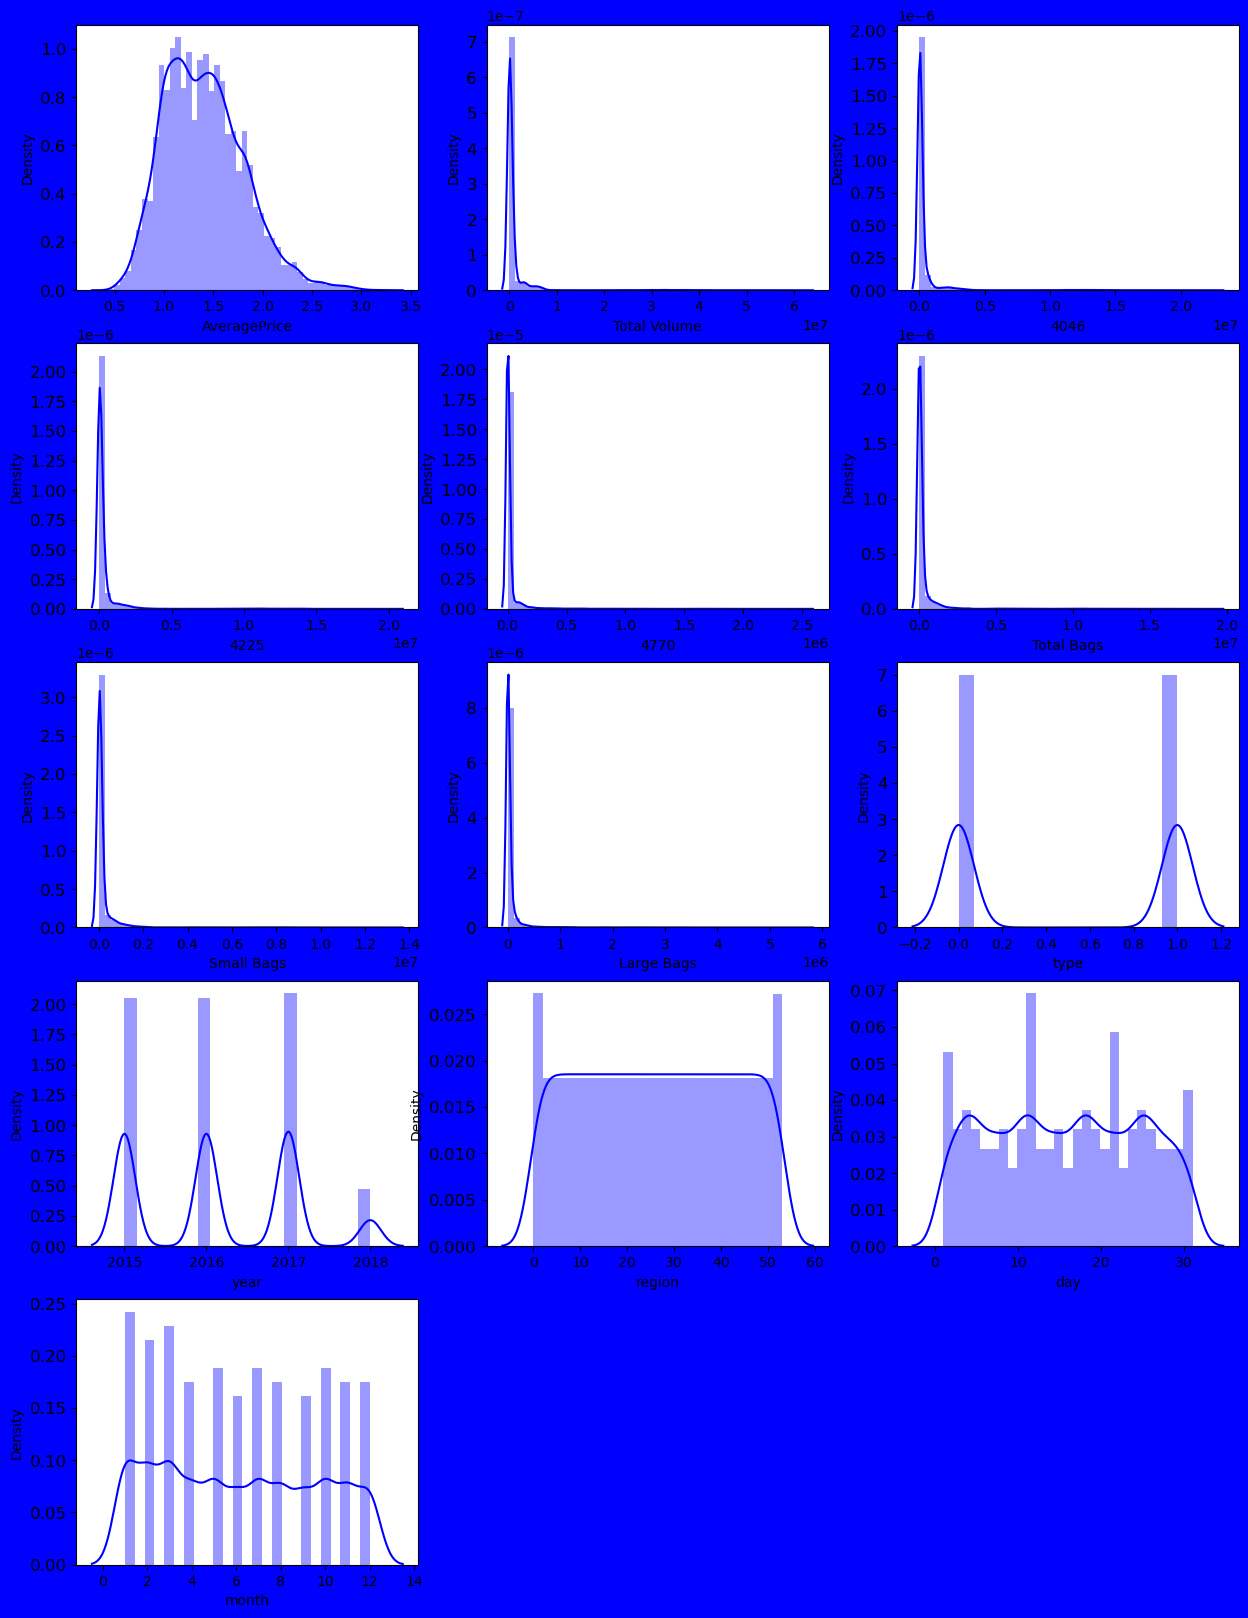

In [23]:
#Chckeing outliers in the dataset by using distplot
plt.figure(figsize=(15,20), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.show()

There are outliers present in 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags' & 'Large Bags'. Need to remove these outliers

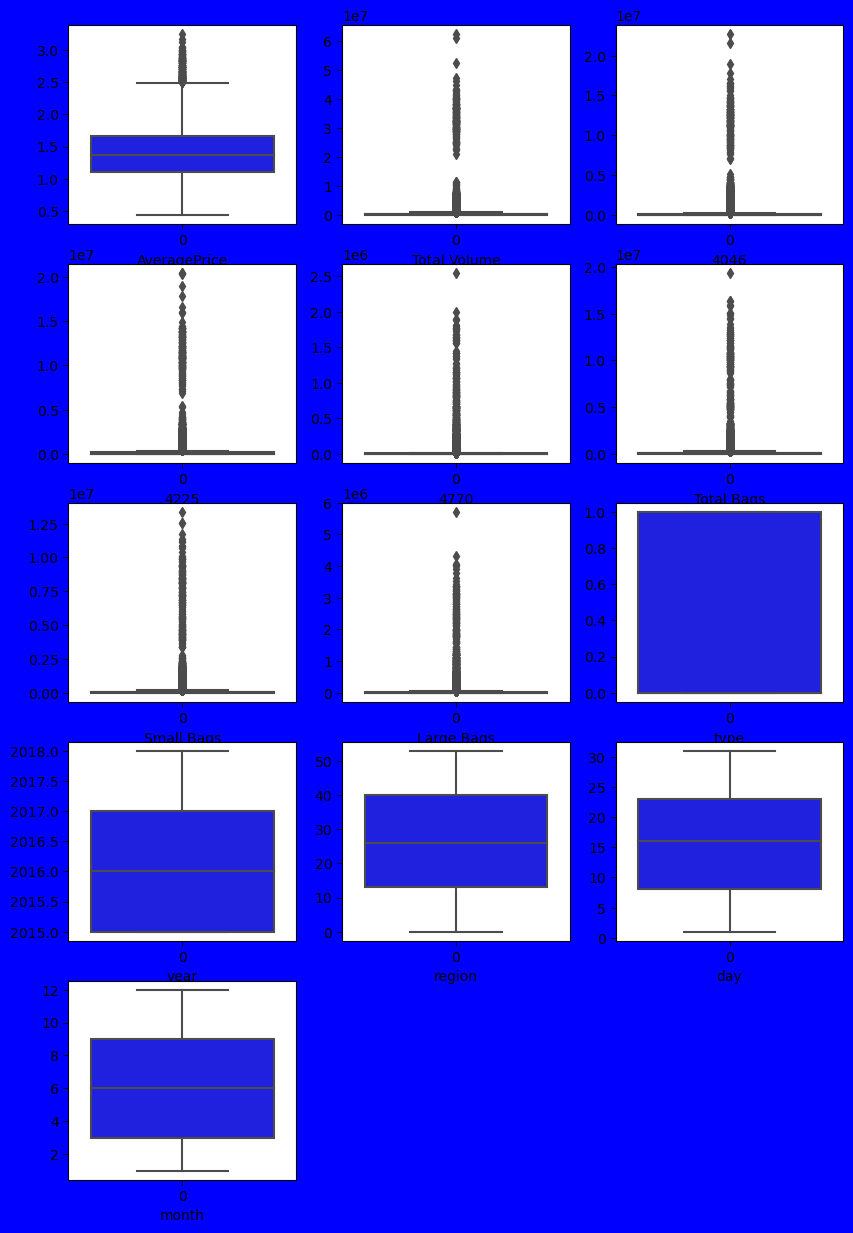

In [24]:
#Checking outliers in box plot also
plt.figure(figsize=(10,15), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In box plot alos I can see there are huge outliers present in this dataset.

In [25]:
#Using zscore technique to remove outliers from the dataset.
from scipy.stats import zscore
z_score=zscore(df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']])
abs_z_score=np.abs(z_score)

In [26]:
filter_entry=(abs_z_score<3).all(axis=1)

In [27]:
df=df[filter_entry]

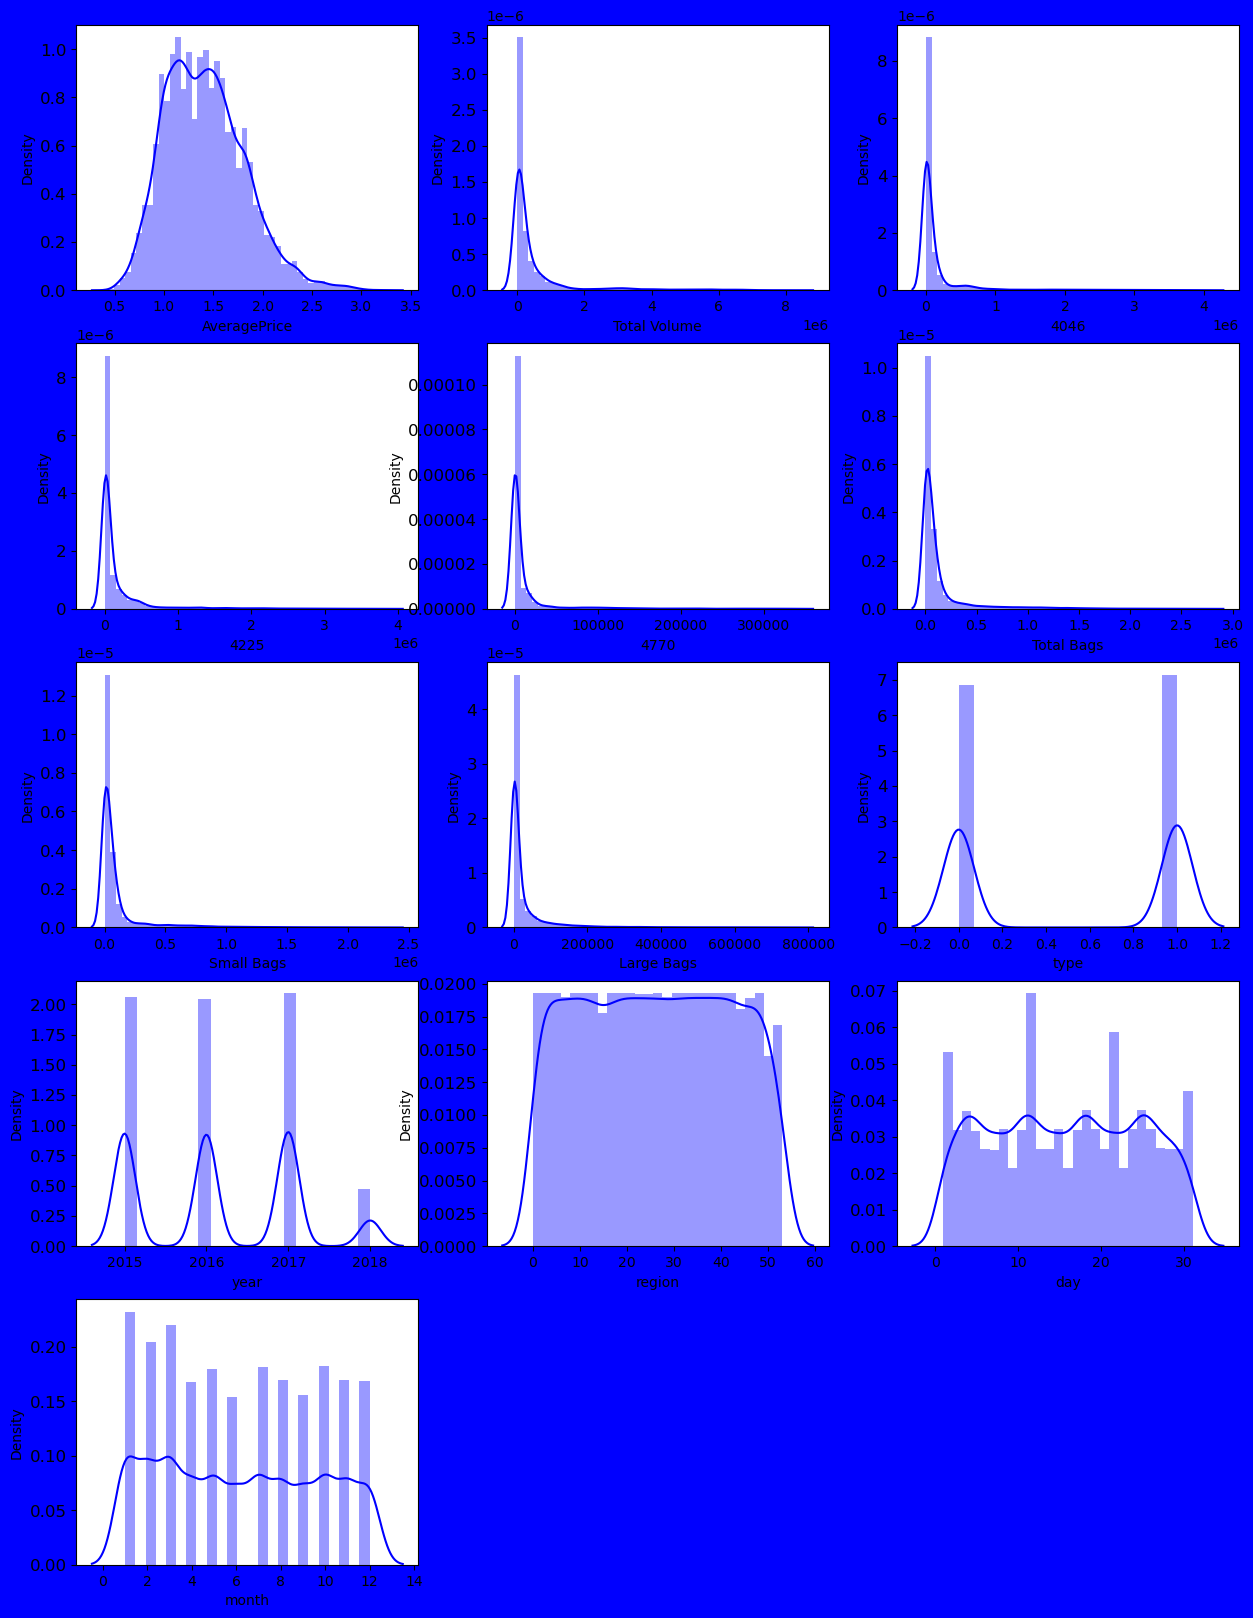

In [28]:
#Chckeing agin outliers in the dataset by using distplot
plt.figure(figsize=(15,20), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.show()

In [29]:
df.shape

(17867, 13)

Total 382 data lost after applying zscore technique.

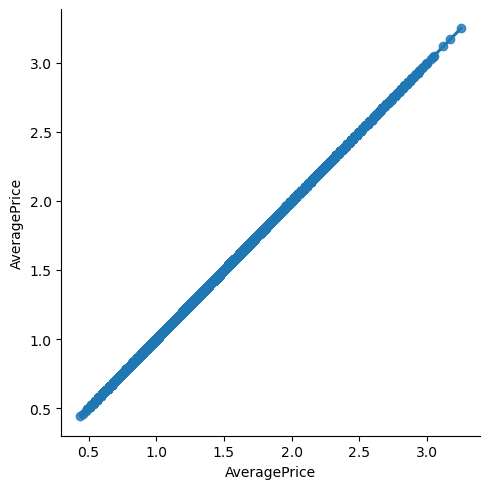

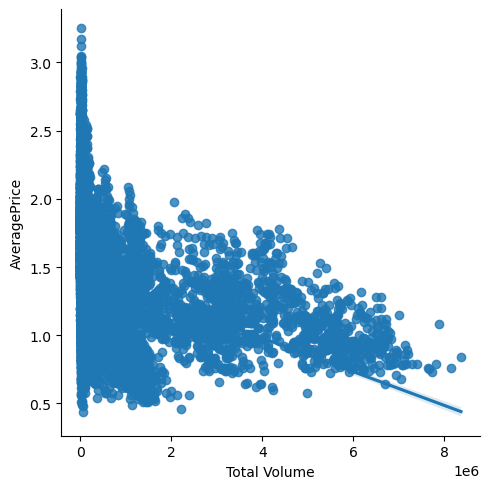

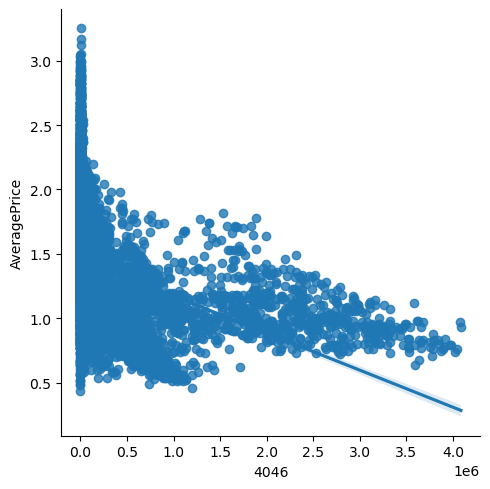

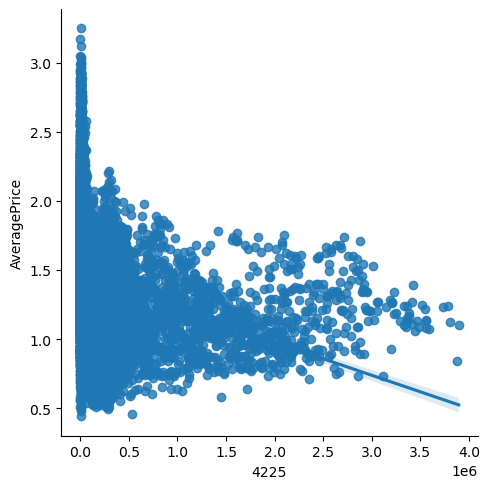

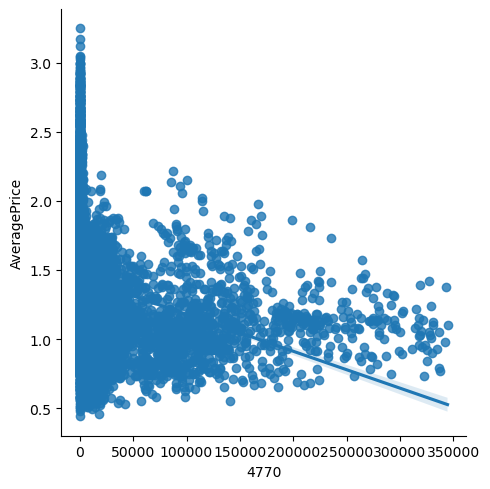

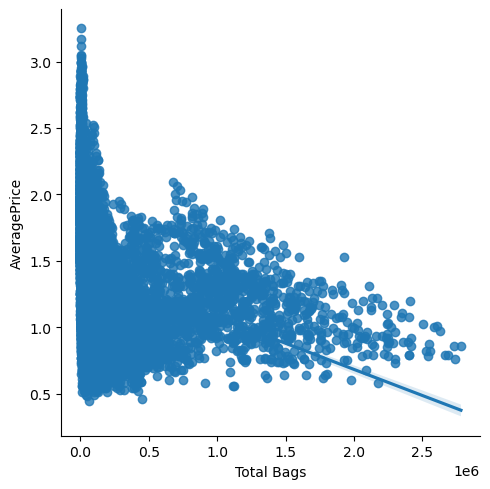

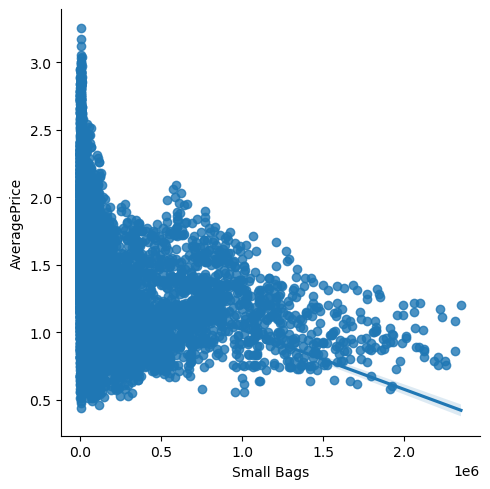

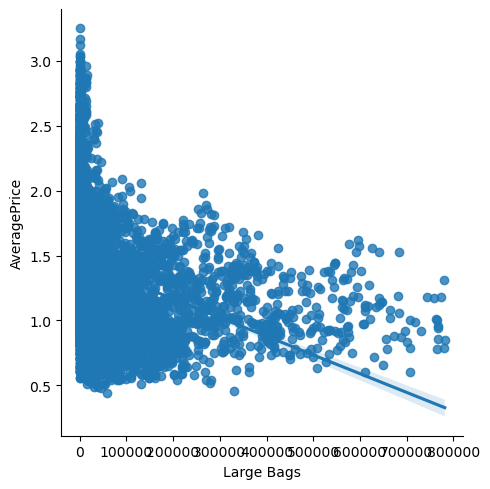

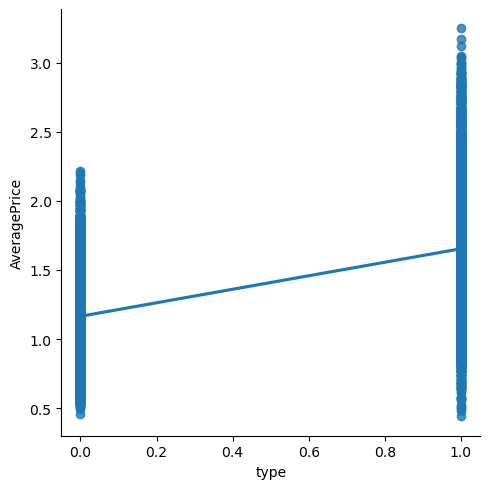

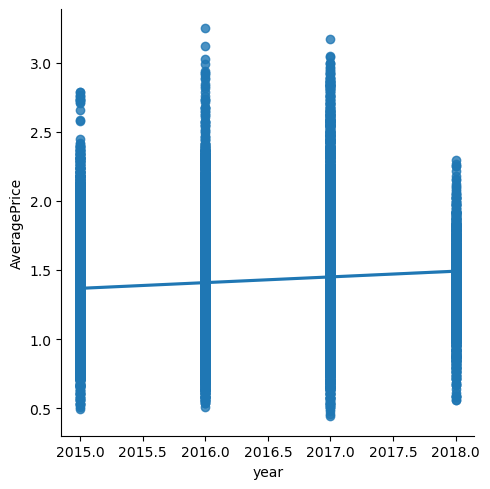

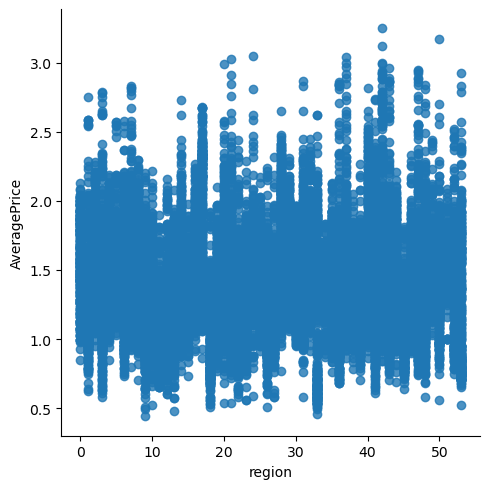

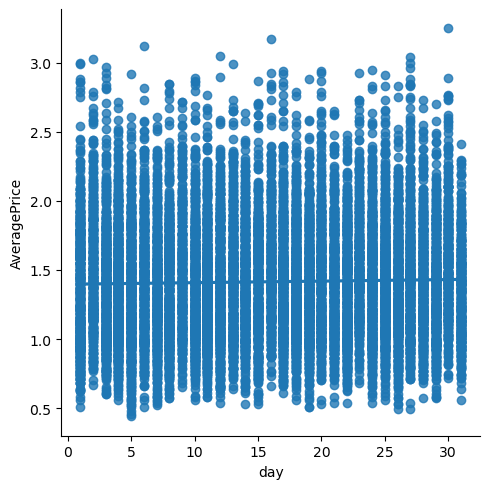

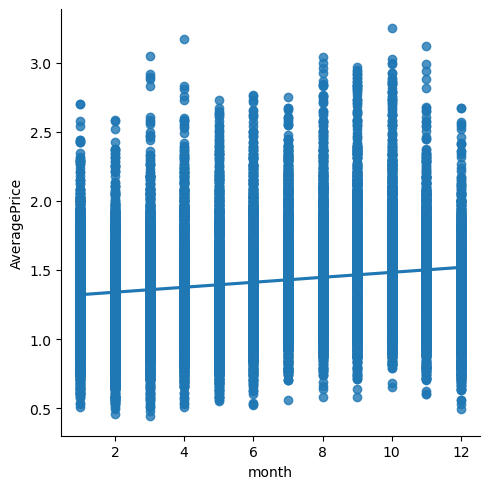

In [30]:
#Chking regression model fits across grids by using lmplot
for i in df:
    sns.lmplot(x=i, y='AveragePrice',data=df, palette='colorblind')

<Axes: >

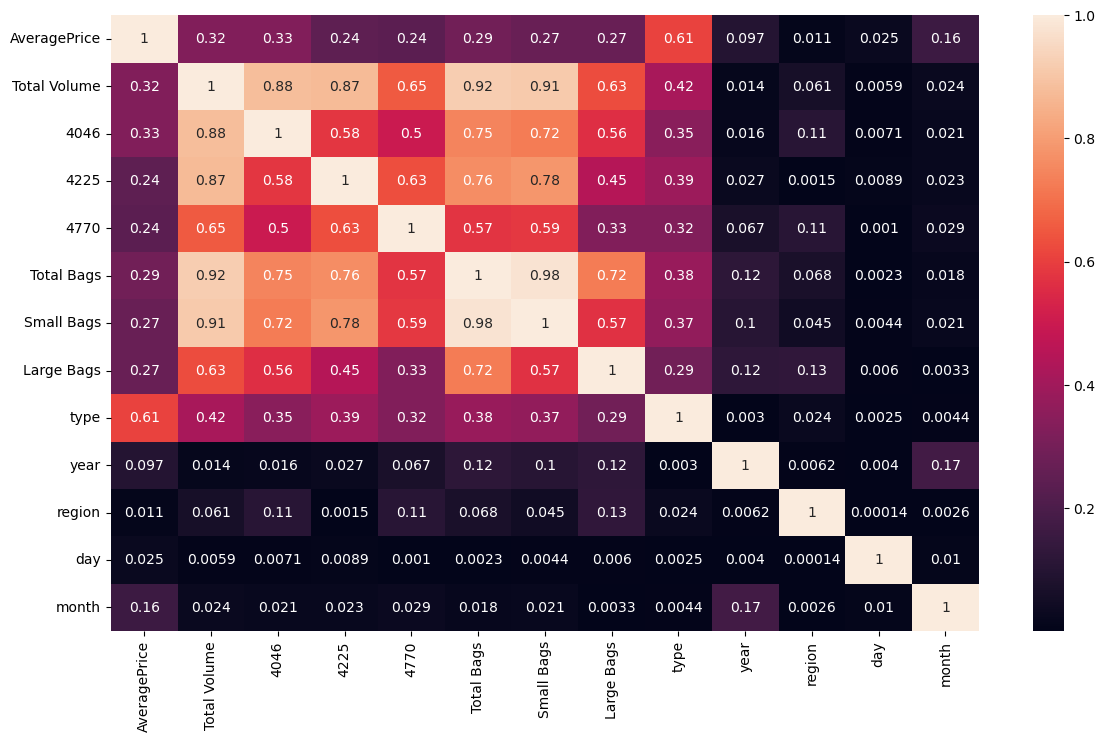

In [31]:
#Now I will check Multicollinearity issue in independend variables
df_corr=df.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

Total Bags & Small Bags are highly correlated. I am again checking Multicollinearity issue by using VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('AveragePrice',axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif


,vif,feature
0,5.461357e+08,Total Volume
1,9.453811e+07,4046
2,7.983605e+07,4225
3,5.754271e+05,4770
4,4.344055e+07,Total Bags
5,2.802506e+03,Small Bags
6,2.364960e+02,Large Bags
7,2.515293e+00,type
8,1.216239e+01,year
9,4.118873e+00,region


4046 & 4225 columns are highly correlated and need to remvoe

In [33]:
df.drop(['4046','4225'], axis=1, inplace=True)

In [34]:
df.head()

,AveragePrice,Total Volume,4770,Total Bags,Small Bags,Large Bags,type,year,region,day,month
0,1.33,64236.62,48.16,8696.87,8603.62,93.25,0,2015,0,27,12
1,1.35,54876.98,58.33,9505.56,9408.07,97.49,0,2015,0,20,12
2,0.93,118220.22,130.50,8145.35,8042.21,103.14,0,2015,0,13,12
3,1.08,78992.15,72.58,5811.16,5677.40,133.76,0,2015,0,6,12
4,1.28,51039.60,75.78,6183.95,5986.26,197.69,0,2015,0,29,11


Now I am going to build the model

In [35]:
x=df.drop('AveragePrice', axis=1)
y=df.AveragePrice

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [38]:
for i in range(1,100):
    x_train, x_test, y_train, y_test=tts(x_scale, y, test_size=0.25, random_state=i)

In [39]:
lr=LinearRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test, pred)
print("Best Accuracy score is :", acc, "at Random_state :", i)

Best Accuracy score is : 0.42353892049176955 at Random_state : 99


In [40]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'R2 Score:{r2_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'R2 Score:{r2_score(y_test,ypred)*100:2f}%')
            
        print("\nMean Absolute Error:", mean_absolute_error(y_test,ypred))
        print("\nMean Squared Error:", mean_squared_error(y_test,ypred))
        print("\nRoot Mean Squared Error:", np.sqrt(mean_squared_error(y_test,ypred)))

In [41]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
lso=Lasso()
rdg=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gbr=GradientBoostingRegressor()

In [42]:
models={'RandomForestRegressor':rfr,'DecisionTreeRegressor':dtr,'KNN':knn,'Lasso':lso,'Ridge':rdg,'ExtraTreesRegressor':etr,'SVR':svr,'GradientBoostingRegressor':gbr}

In [43]:
#Now I am training all models by using for loop.
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Model Name is :', name)
    metric_score(model,x_train, x_test, y_train, y_test, train=True)
    metric_score(model,x_train, x_test, y_train, y_test, train=False)
    print('\n')

Model Name is : RandomForestRegressor

===============================train result==============
R2 Score:98.150991%

===============================test result==============
R2 Score:86.623674%

Mean Absolute Error: 0.10082966196552494

Mean Squared Error: 0.020974957866577115

Root Mean Squared Error: 0.14482733811879964


Model Name is : DecisionTreeRegressor

===============================train result==============
R2 Score:100.000000%

===============================test result==============
R2 Score:71.146352%

Mean Absolute Error: 0.13884486232370716

Mean Squared Error: 0.04524441459592567

Root Mean Squared Error: 0.2127073449505815


Model Name is : KNN

===============================train result==============
R2 Score:69.165772%

===============================test result==============
R2 Score:53.848460%

Mean Absolute Error: 0.1946532348332214

Mean Squared Error: 0.07236864472800536

Root Mean Squared Error: 0.26901420915632945


Model Name is : Lasso

=================

In [44]:
RandomForestRegressor, DecisionTreeRegressor, ExtraTreesRegressor

(sklearn.ensemble._forest.RandomForestRegressor,
 sklearn.tree._classes.DecisionTreeRegressor,
 sklearn.ensemble._forest.ExtraTreesRegressor)

In [45]:
mdl=[rfr,dtr,etr]

In [46]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,r2_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestRegressor()
Score:  [-0.53379738  0.46025954  0.5410935   0.16632917 -0.00325718]
Score Mean:  0.1261255301212889
diffrent Between Accuracy Score and CV score is : 0.5954448091009426


Model Name is : DecisionTreeRegressor()
Score:  [-1.45652839  0.12590832  0.21038252 -0.78423373 -0.35062624]
Score Mean:  -0.4510195031267098
diffrent Between Accuracy Score and CV score is : 1.1726079083434429


Model Name is : ExtraTreesRegressor()
Score:  [-0.39310876  0.38488116  0.4594076   0.17753779  0.0539222 ]
Score Mean:  0.1365279981328551
diffrent Between Accuracy Score and CV score is : 0.5850538622615644




ExtraTreesRegressor is the best model as per Cross Validation Score. So, I am going to Tunning the parameters by using GridSearch CV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_param={'max_features':['sqrt', 'log2'],
      'min_samples_leaf':[1,3,4,5],
      'max_leaf_nodes': [10, 20, 50, 90],
      'max_depth':[0,20,35],
      'n_jobs':[-2,-1,1],
      'n_estimators':[10,55,150]}

In [49]:
gcv=GridSearchCV(ExtraTreesRegressor(),grid_param,cv=5)

In [50]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [0, 20, 35],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 50, 90],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'n_estimators': [10, 55, 150], 'n_jobs': [-2, -1, 1]})

In [57]:
gcv.best_params_

{'max_depth': 35,
 'max_features': 'log2',
 'max_leaf_nodes': 90,
 'min_samples_leaf': 1,
 'n_estimators': 150,
 'n_jobs': -1}

In [54]:
final_model=ExtraTreesRegressor(max_features='log2', max_depth=35,n_estimators=150,n_jobs=-1,max_leaf_nodes=90,min_samples_leaf=1, random_state=10)

In [55]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test, pred)*100

In [56]:
acc

57.01674521916205

After applying Hyper Parameter Tuning the r2score is 57% before tuning the parameter r2score was 89%

# Now I am working on classification model. Region is continuous label so unable to run classification model on it. So, I am applying classification on 'Type' label.

In [8]:
df1=pd.read_csv('https://raw.githubusercontent.com/vikaskadam05/MyData/main/avocado.csv')

In [9]:
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df1=df1.drop('Unnamed: 0', axis=1)

In [11]:
df1['Date']=pd.to_datetime(df1['Date'])

In [12]:
# extract the day, month, and removing Date column
df1['day'] = df1['Date'].dt.day
df1['month'] = df1['Date'].dt.month
df1=df1.drop('Date', axis=1)

In [13]:
for i in df1.columns:
    print(df1[i].value_counts(), "\n")

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64 

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64 

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64 

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64 

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name

In [14]:
#Converting categorical data into contnues data.
from sklearn.preprocessing import LabelEncoder
cal=['type','region']

for i in cal:
    le=LabelEncoder()
    df_1=le.fit_transform(df1[i])
    df1[i]=df_1

In [15]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,11


In [16]:
df1['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [17]:
df1.drop('XLarge Bags', axis=1, inplace=True)

In [18]:
#Using zscore technique to remove outliers from the dataset.
from scipy.stats import zscore
z_score=zscore(df1[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']])
abs_z_score=np.abs(z_score)
filter_entry=(abs_z_score<3).all(axis=1)

In [19]:
df1=df1[filter_entry]

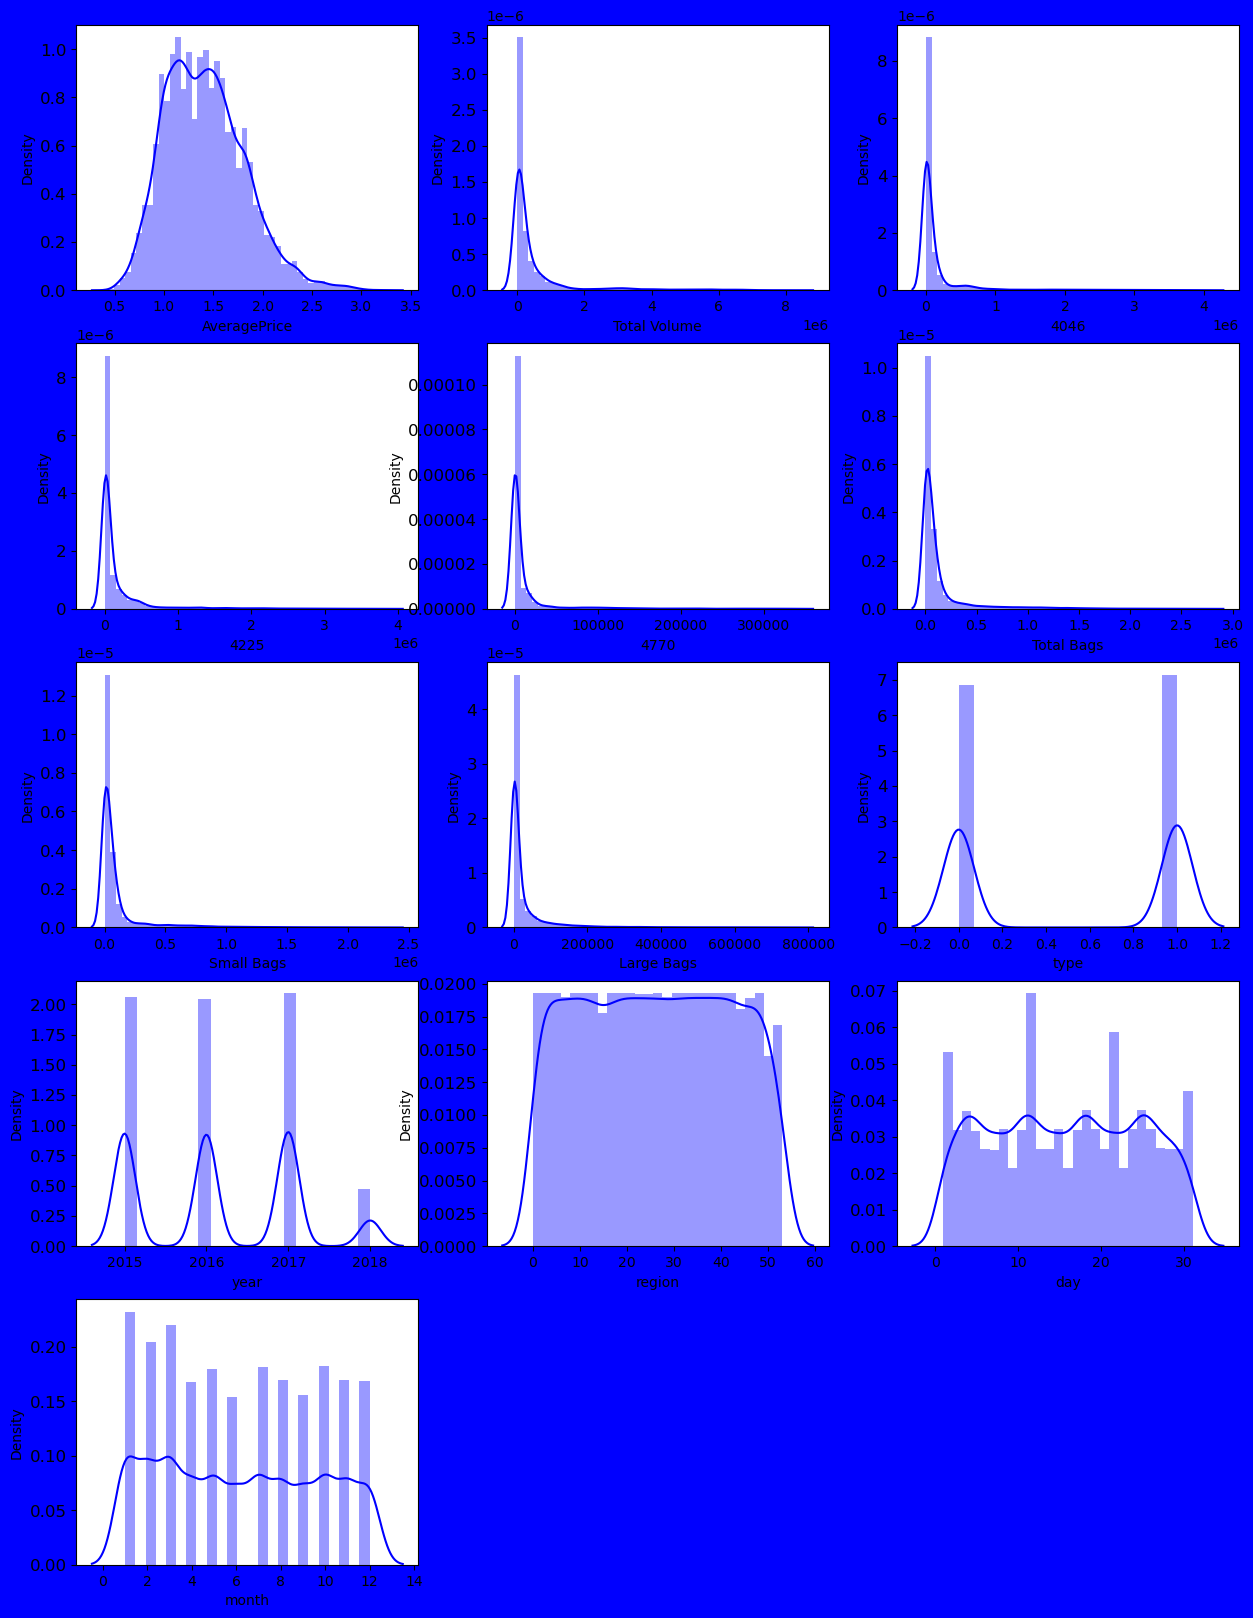

In [20]:
#Chckeing outliers in the dataset by using distplot
plt.figure(figsize=(15,20), facecolor='blue')
plotnumber=1

for i in df1:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df1[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df1.drop('type',axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.577972e+01,AveragePrice
1,5.453279e+08,Total Volume
2,9.439827e+07,4046
3,7.971776e+07,4225
4,5.745732e+05,4770
5,4.337438e+07,Total Bags
6,2.808426e+03,Small Bags
7,2.373376e+02,Large Bags
8,2.323855e+01,year
9,4.120627e+00,region


In [22]:
#Removing high vif value features.
df1.drop('4046', axis=1, inplace=True)

In [24]:
x1=df1.drop('type', axis=1)
y1=df1.type

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [31]:
for i in range(1,100):
    x_train, x_test, y_train, y_test=tts(x_scaled, y1, test_size=0.25, random_state=i)

In [32]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
svc=SVC()

In [33]:
mdl=[etc,rfc,dtc,knn,lr,gbc,bc,svc]

In [34]:
for i in mdl:
    i.fit(x_train, y_train)
    ypred=i.predict(x_train)
    trainacc=accuracy_score(y_train, ypred)
    pred=i.predict(x_test)
    testacc=accuracy_score(y_test, pred)
    print(i)
    print("Train Result :", trainacc, '| ' "Test Result :", testacc)
    print('\n')

ExtraTreesClassifier()
Train Result : 1.0 | Test Result : 0.9973136333109469


RandomForestClassifier()
Train Result : 1.0 | Test Result : 0.9952988582941572


DecisionTreeClassifier()
Train Result : 1.0 | Test Result : 0.9883590776807701


KNeighborsClassifier()
Train Result : 0.9524626865671642 | Test Result : 0.9138124020595478


LogisticRegression()
Train Result : 0.9247014925373135 | Test Result : 0.9227669576897246


GradientBoostingClassifier()
Train Result : 0.9957462686567164 | Test Result : 0.9912693082605776


BaggingClassifier()
Train Result : 0.9991791044776119 | Test Result : 0.9935079471681217


SVC()
Train Result : 0.9547761194029851 | Test Result : 0.9520931273785539




Every model has given good result. So, I will check CV score by using GridsearchCV on every model.

In [35]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [36]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x1,y1)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : ExtraTreesClassifier()
Score:  [0.9815333  0.94851707 0.97844948 0.96053736 0.96445564]
Score Mean:  0.9666985698089148
diffrent Between Accuracy Score and CV score is : 0.026809377359206965


Model Name is : RandomForestClassifier()
Score:  [0.98908786 0.98265249 0.9890848  0.97788973 0.9806885 ]
Score Mean:  0.9838806750435516
diffrent Between Accuracy Score and CV score is : 0.010074999906079074


Model Name is : DecisionTreeClassifier()
Score:  [0.97817571 0.9804141  0.96753428 0.95074167 0.96277638]
Score Mean:  0.9679284304609383
diffrent Between Accuracy Score and CV score is : 0.025579516707183392


Model Name is : KNeighborsClassifier()
Score:  [0.93200895 0.90962507 0.95382032 0.92611251 0.93506857]
Score Mean:  0.9313270845774696
diffrent Between Accuracy Score and CV score is : 0.06218086259065214


Model Name is : LogisticRegression()
Score:  [0.94711807 0.91130386 0.93702771 0.9286314  0.92163448]
Score Mean:  0.9291431054051943
diffrent Between Accuracy S

GradientBoostingClassifier has given good CV score. So, I will try to tune the model by using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param=({
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05,],
    "min_samples_split": [10,11,12],
    "min_samples_leaf": [5,6,7],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.95, 1.0],
    "n_estimators":[5]}) 

In [42]:
grid=GridSearchCV(GradientBoostingClassifier(), param_grid=param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [10, 11, 12], 'n_estimators': [5],
                         'subsample': [0.5, 0.618, 0.8, 0.95, 1.0]})

In [46]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 5,
 'subsample': 0.95}

In [47]:
final_model=GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.05,
 loss= 'deviance',
 max_depth= 8,
 max_features= 'log2',
 min_samples_leaf= 5,
 min_samples_split= 10,
 n_estimators= 5,
 subsample= 0.95)

In [51]:
final_model.fit(x_train, y_train)
ypred=final_model.predict(x_test)
accuracy_score(y_test, pred)

0.9834340720841728

Final Score of final_model is 98% after applying GridSearchCV.